# Compare the results from unbalanced and balanced data

In [1]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix

from param import *

sns.set_theme(style="whitegrid")
output_dir = ParamDir().output_dir
datalist = ParamDir().data_path_list

<AxesSubplot:xlabel='mouse type', ylabel='accuracy'>

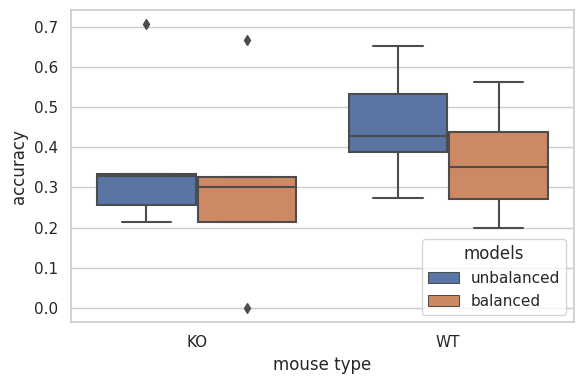

In [4]:
files_path = [
    ("unbalanced","tsc_train_rocket.pickle"),
    ("balanced","tsc_train_rocket_balanced.pickle")
]

fig, ax = plt.subplots(figsize=(6, 4), tight_layout = True, sharey=True)

accu_all = []
for m_id, data_dir in enumerate(datalist):
    data_name = str(data_dir).split('/')[-1]
    for method, file_path in files_path:
        with open(output_dir/data_name/file_path,"rb") as f:
            results = pickle.load(f)
        accu = np.sum((results["y_test"]==results["y_pred"]))/len(results["y_pred"])
        if "KO" in data_name:
            accu_all.append([accu, "KO", method])
        else:
            accu_all.append([accu, "WT", method])

accu_all = pd.DataFrame(accu_all, columns=["accuracy", "mouse type", "models"])

sns.boxplot(y="accuracy", x="mouse type", hue="models", data=accu_all, ax=ax)
